**Autolib electric car-sharing service company**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset:

Null hypothesis:
  The average number of blue cars taken is not different from that of the blue cars returned.

Alternative hypothesis:
  The average number of blue cars taken is different from that of the blue cars returned.

  To work on this project, we will perform the following analysis with Python; 

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.
This will need to be documented when writing the report. 

# **DATA EXPLORATION**

In [190]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import shapiro
from scipy.stats import norm

In [112]:
df0 = 'DSCoreAutolibDatasetGlossary'

In [4]:

with open(df0, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.0, 'encoding': None, 'language': None}

In [106]:
df = pd.read_csv("DSCoreAutolibDataset")
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [107]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [108]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
def size_shape(data):
  return data.info(),data.shape, data.size
size_shape(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


(None, (16085, 13), 209105)

In [7]:
# Function to check for duplicates
def duplicates(data):
  out =df.duplicated().any()
  if out == False:
    return out
  else:
    pass
    # remove the duplicates and return data without duplicates

In [8]:
# Checking for duplicates
duplicates(df)

False

In [115]:
df.columns = ['Postal_code', 'Date', 'N_daily_data_points', 'Day_Of_Week', 'Day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',	'Slots_freed_sum',	'Slots_taken_sum']
df.head(2)

,Postal_code,Date,N_daily_data_points,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [10]:
# Function to check for missing values
def missing (data):
  # Total sum of missing values
  miss =df.isnull().sum().sort_values(ascending = False)
  # Percentage of the total
  #percentage =(df.isnull().sum()/ len(df)).sort_values(ascending = False)
  # Store in a dataframe
  miss_values = pd.DataFrame({'Total missing':miss})
  return miss_values
  # remove duplicates and return data without duplicates


In [11]:
# Checking missing data
missing(df)

,Total missing
Slots_taken_sum,0
Slots_freed_sum,0
Utilib_14_returned_sum,0
Utilib_14_taken_sum,0
Utilib_returned_sum,0
Utilib_taken_sum,0
BlueCars_returned_sum,0
BlueCars_taken_sum,0
Day_type,0
Day_Of_Week,0


In [113]:
# Dropping null values
df.dropna(inplace=True)

In [114]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(9783, 13)
(16085, 13)


In [116]:
df1.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [123]:
df1.columns = ['Postal_code', 'Date', 'N_daily_data_points', 'Day_Of_Week', 'Day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',	'Slots_freed_sum',	'Slots_taken_sum']
df1.head(2)

,Postal_code,Date,N_daily_data_points,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0


In [124]:
def size_shape(data):
  return data.info(),data.shape, data.size
size_shape(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal_code             9783 non-null   int64 
 1   Date                    9783 non-null   object
 2   N_daily_data_points     9783 non-null   int64 
 3   Day_Of_Week             9783 non-null   int64 
 4   Day_type                9783 non-null   object
 5   BlueCars_taken_sum      9783 non-null   int64 
 6   BlueCars_returned_sum   9783 non-null   int64 
 7   Utilib_taken_sum        9783 non-null   int64 
 8   Utilib_returned_sum     9783 non-null   int64 
 9   Utilib_14_taken_sum     9783 non-null   int64 
 10  Utilib_14_returned_sum  9783 non-null   int64 
 11  Slots_freed_sum         9783 non-null   int64 
 12  Slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


(None, (9783, 13), 127179)

In [125]:
missing(df1)

,Total missing
Slots_taken_sum,0
Slots_freed_sum,0
Utilib_14_returned_sum,0
Utilib_14_taken_sum,0
Utilib_returned_sum,0
Utilib_taken_sum,0
BlueCars_returned_sum,0
BlueCars_taken_sum,0
Day_type,0
Day_Of_Week,0


In [126]:
# checking for duplicates
df1.duplicated().any()

False

In [127]:
# Checking for uniqueness
df1.nunique()

Postal_code                79
Date                      130
N_daily_data_points         3
Day_Of_Week                 7
Day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

**EXPLORATORY ANALYSIS**

In [130]:
df1.sample(5)

,Postal_code,Date,N_daily_data_points,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
10294,93130,1/16/2018,1440,1,weekday,20,18,2,2,0,1,0,0
14243,94220,1/30/2018,1440,1,weekday,36,47,3,2,1,1,0,0
13315,94110,2/7/2018,1439,2,weekday,31,26,1,1,1,1,0,0
4297,91400,3/31/2018,1440,5,weekend,11,9,0,0,0,0,0,0
5484,92160,1/28/2018,1440,6,weekend,33,33,2,2,0,0,0,0


In [129]:
# Extract day type data
# The selected periods of interest be either weekdays or weekends but not a mix of both.
df2 = df1[df1.Day_type == 'weekend']

In [131]:
# previe dataset when its during the weekend
df2.sample(5)

,Postal_code,Date,N_daily_data_points,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
10306,93130,1/28/2018,1440,6,weekend,51,45,2,1,0,1,0,0
14768,94340,3/31/2018,1440,5,weekend,49,46,1,0,1,3,0,0
14790,94340,4/22/2018,1440,6,weekend,43,34,1,1,7,6,0,0
7586,92310,4/15/2018,1439,6,weekend,85,79,0,0,3,4,0,0
11592,93350,4/15/2018,1439,6,weekend,24,19,1,1,2,2,3,2


The selected periods of interest be either weekdays or weekends but not a mix of both which has led to me choosing weekend.

### **Univariate Analysis**

In [15]:
# Function to calculate the various means
def mean (data):
  # Calculate means
  mean = mean1 = df[['BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']].mean()
  #percentage =  mean/len(df)
  # Store in a dataframe
  mean_values = pd.DataFrame({'Mean':mean})
  return mean_values
  
  

In [16]:
# View dataset
mean(df)

,Mean
BlueCars_taken_sum,125.926951
BlueCars_returned_sum,125.912714
Utilib_taken_sum,3.698290
Utilib_returned_sum,3.699099
Utilib_14_taken_sum,8.600560
Utilib_14_returned_sum,8.599192
Slots_freed_sum,22.629033
Slots_taken_sum,22.629282


Above are the means of every column

In [135]:
df2.head(0)

,Postal_code,Date,N_daily_data_points,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum


In [134]:
# get proprotion of day of week
df2['Day_Of_Week'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: Day_Of_Week, dtype: float64

from the Day_Of_Week_ column:
5 - represends friday
6 - represends saturday

In [136]:
# Describe numerical variables
df2[['BlueCars_taken_sum', 'BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

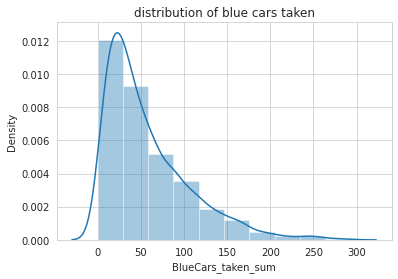

In [137]:
# Plot bluecars taken
sns.distplot(df2['BlueCars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

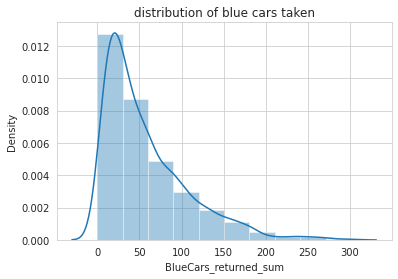

In [138]:
# Plot bluecars taken
sns.distplot(df2['BlueCars_returned_sum'], bins=10)
plt.title('distribution of blue cars taken')

In [140]:
df2['Postal_code'] = df2['Postal_code'].apply(str)
df2['Day_Of_Week'] = df2['Day_Of_Week'].apply(str)
print(df2.dtypes)

Postal_code               object
Date                      object
N_daily_data_points        int64
Day_Of_Week               object
Day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Mode**

In [139]:
# postal code frequency distribution    75015 vs 75017
df.Postal_code.value_counts().head(5)

94130    156
92310    156
78140    156
94700    156
95100    156
Name: Postal_code, dtype: int64

In [18]:
# check frequency distribution
df.Day_type.value_counts()

weekday    11544
weekend     4541
Name: Day_type, dtype: int64

In [19]:
# function to get mode
def get_mode(data, column):
  out = data[column].mode()
  value = data[column].value_counts()
  return out
  

In [20]:
get_mode(df, 'Day_type')

0    weekday
dtype: object

In [21]:
print(df[['BlueCars_taken_sum','BlueCars_returned_sum']].mode())

   BlueCars_taken_sum  BlueCars_returned_sum
0                  12                     13


In [22]:
def visuals(data, column, palette):
  data = data.groupby(column)[column].count()

  sns.set_style("whitegrid")
  ax, bar = plt.subplots(figsize=(12,10))
  ax = sns.barplot(x = data.keys(), y = data.values, data=data, palette=palette)
  ax.set_ylabel('count', fontsize=14)
  ax.set_xlabel(("column Title") , fontsize=14)
  plt.show()  

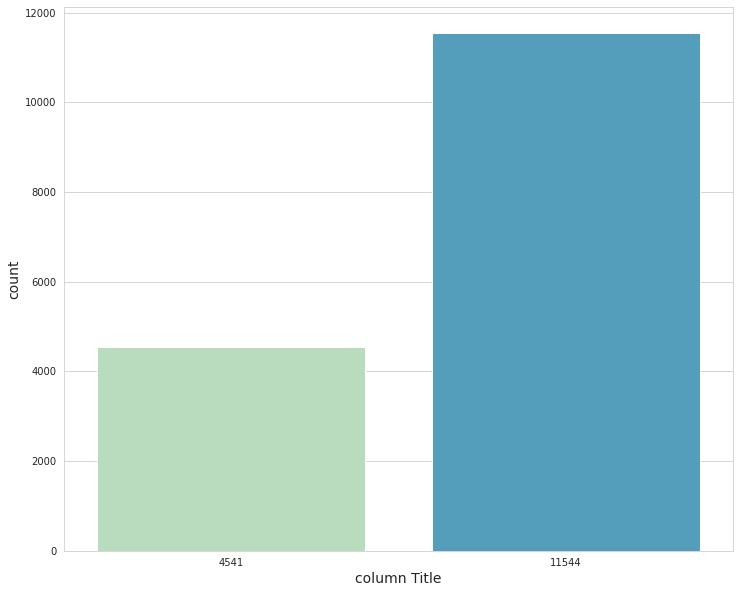

In [23]:
visuals(df, 'Day_type', 'GnBu')

In [24]:
data = df.groupby("Day_type")['Day_type'].count()
data

Day_type
weekday    11544
weekend     4541
Name: Day_type, dtype: int64

In [25]:
data.keys()

Index(['weekday', 'weekend'], dtype='object', name='Day_type')

In [26]:
data.values

array([11544,  4541])

**Bivariate Analysis**

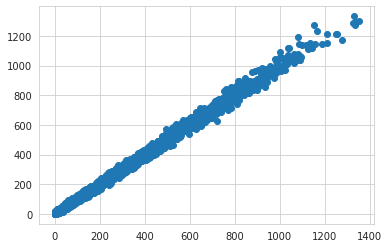

In [27]:
# population cluster sampling
plt.scatter(x=df['BlueCars_taken_sum'], y=df['BlueCars_returned_sum'])

<function matplotlib.pyplot.show>

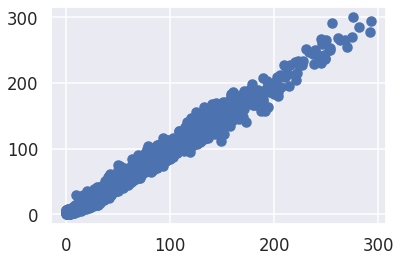

In [197]:
# Sample cluster sampling
plt.scatter(df2['BlueCars_taken_sum'],df2['BlueCars_returned_sum'])
plt.show

In [141]:
def bivariate_visuyals(data,var1,var2):
  bivariate_data = data.groupby([var1,var2])[var2].count()
  out = pd.DataFrame(bivariate_data)
  df = out.rename(columns={'BlueCars_returned_sum': 'BlueCars_returned_sum'})
  return df

In [142]:
bivariate_visuyals(df, 'Day_type', 'BlueCars_returned_sum')

BlueCars_returned_sum
Day_type BlueCars_returned_sum                       
weekday  0                                         24
         1                                         96
         2                                        109
         3                                        135
         4                                        117
...                                               ...
weekend  1276                                       1
         1287                                       1
         1294                                       1
         1300                                       1
         1332                                       1

[1503 rows x 1 columns]

In [ ]:
df1.drop(['Date', 'N_daily_data_points', 'Utilib_taken_sum', 'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum',	'Slots_freed_sum',	'Slots_taken_sum'], axis=1, inplace=True)
df1

In [152]:
# Extract day type data
df4 = df1[df1.Day_type == 'weekend']
df4.sample(5)

,Postal_code,Day_Of_Week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum
12115,93400,5,weekend,141,140
9786,92700,5,weekend,132,135
10777,93200,6,weekend,9,11
7036,92270,5,weekend,63,61
15228,94500,5,weekend,37,47


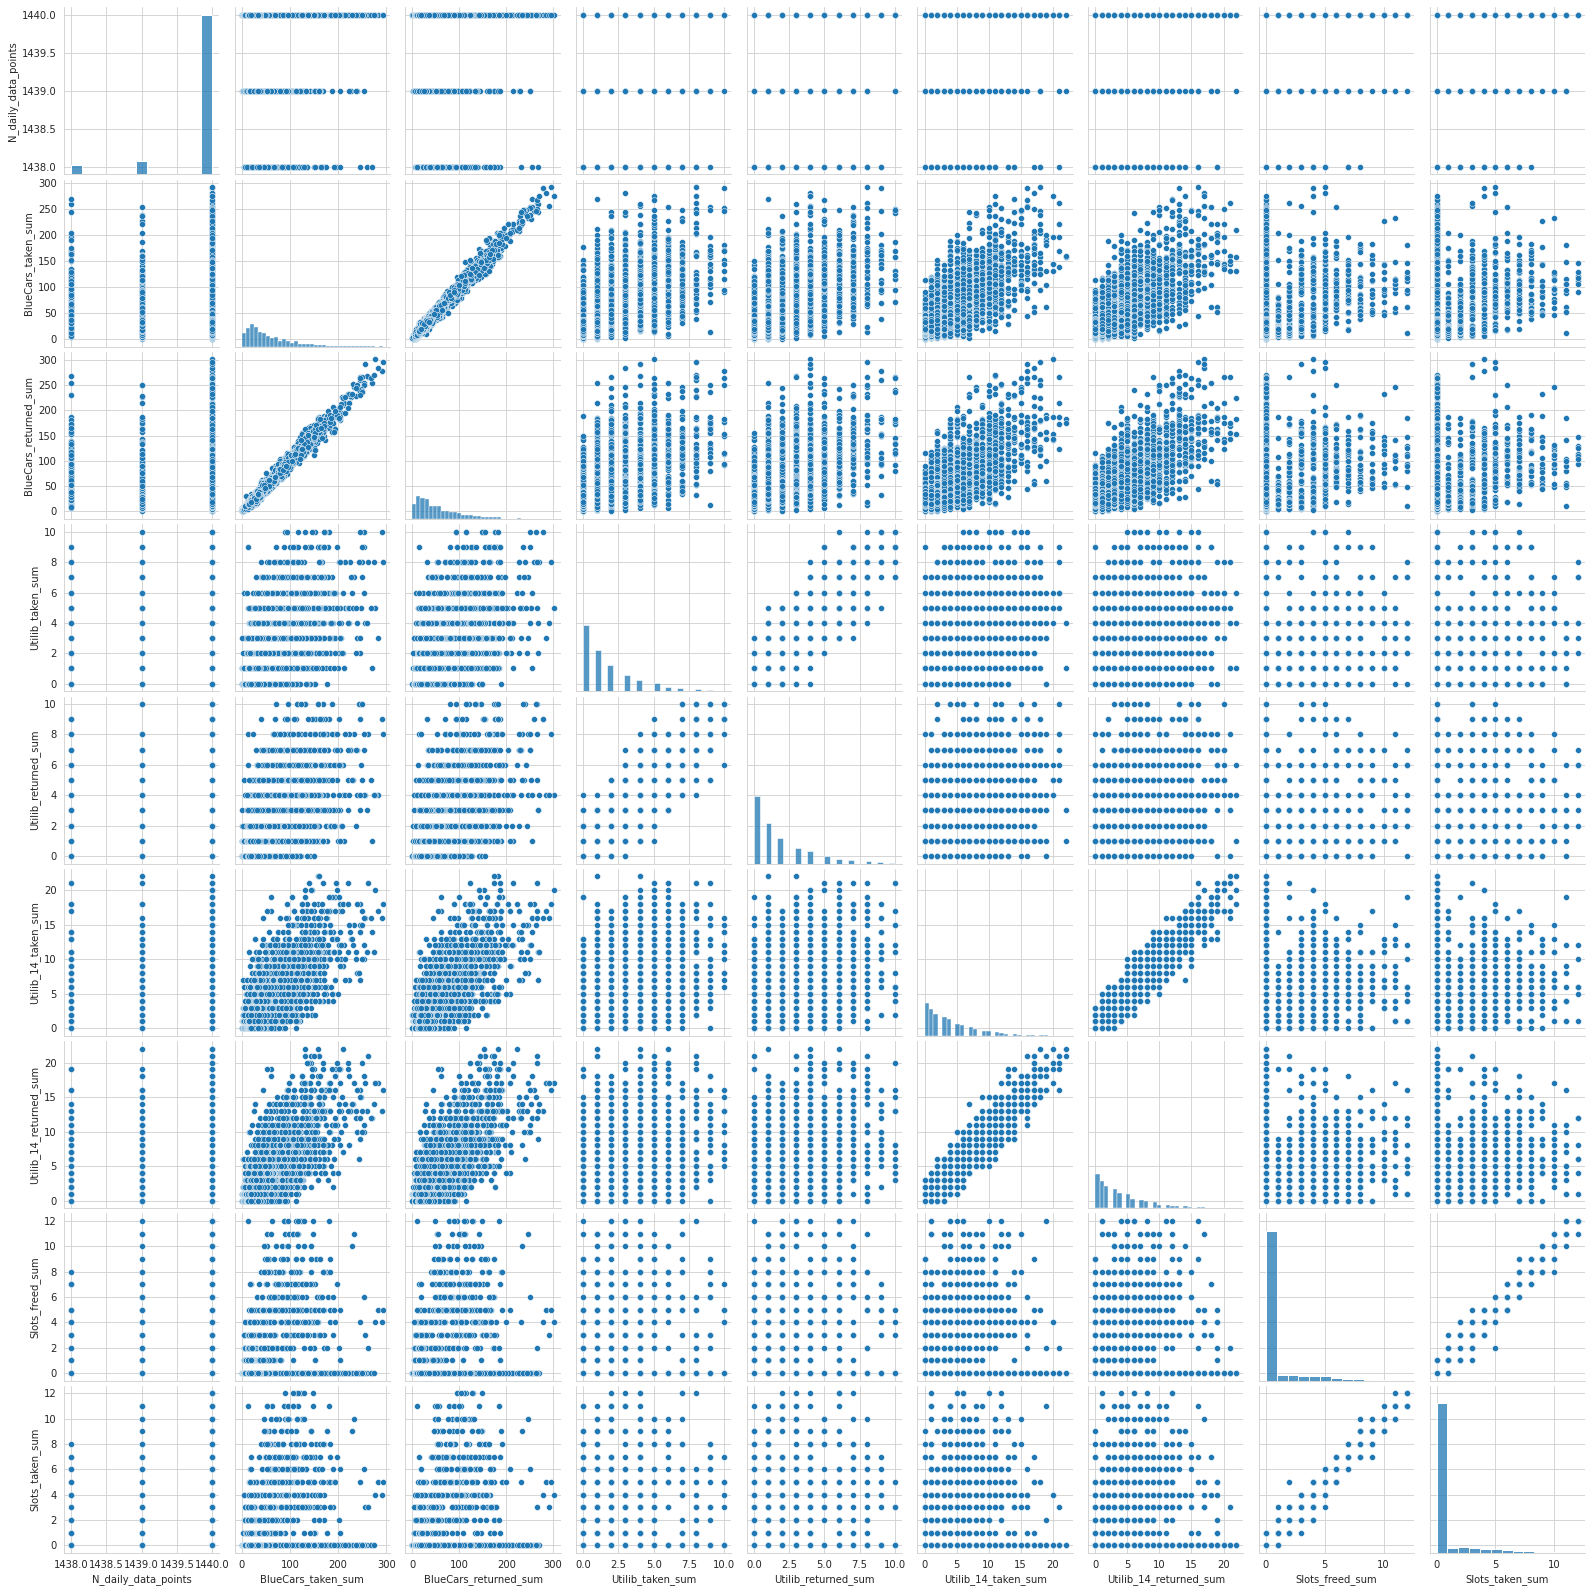

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

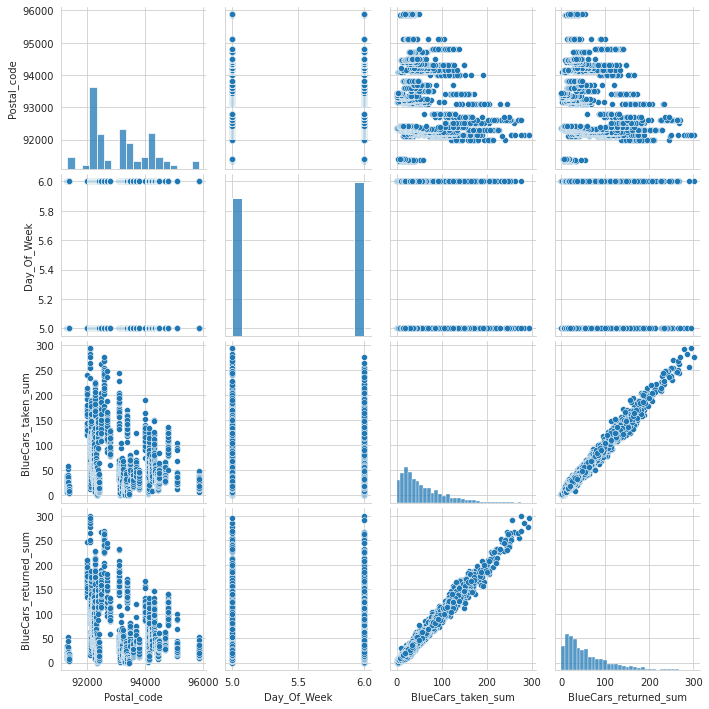

In [153]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df4)
plt.show()

Text(0.5, 1.0, 'BlueCars_taken_sum vs BlueCars_returned_sum')

<Figure size 864x720 with 0 Axes>

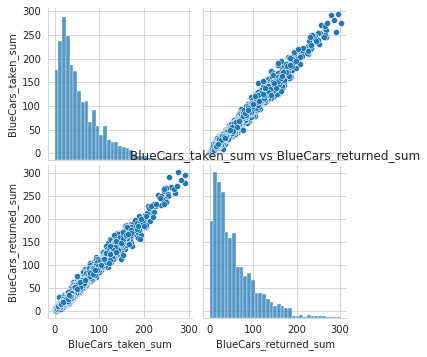

In [155]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['BlueCars_taken_sum','BlueCars_returned_sum']])
plt.title('BlueCars_taken_sum vs BlueCars_returned_sum')

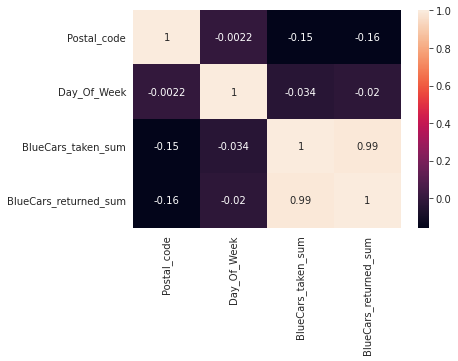

In [162]:
df4['BlueCars_taken_sum'].corr(df4['BlueCars_returned_sum'])
sns.heatmap(df4.corr(),annot=True)
plt.show()

**Hypothesis Testing**

**Hypothesis Statement Formulation**

##  Null hypothesis: 
      The average number of blue cars taken is not different from that of the blue cars returned.
##  Alternative hypothesis:  
      The average number of blue cars taken is different from that of the blue cars returned.

      

In [163]:
df4.columns

Index(['Postal_code', 'Day_Of_Week', 'Day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

In [166]:
# df4.drop(['Day_type'], axis=1, inplace=True)
df4.head(5)

,Postal_code,Day_Of_Week,BlueCars_taken_sum,BlueCars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14


 **NORMALITY TESTS**

In [173]:
def shapiro_test(df4, col_list):
    for x in col_list:
        print(x)
        data = df4[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [175]:
# shapiro Wilk's test To test whether the distribution of scores deviates from a comparable normal distribution.
shapiro_test(df4, list(df4.columns))

Postal_code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


Day_Of_Week
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


BlueCars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


BlueCars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




# **stratified sampling**

In [188]:
# Stratified sample
df5 = df4.groupby('Day_Of_Week', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df5.head(5)

,Postal_code,Day_Of_Week,BlueCars_taken_sum,BlueCars_returned_sum
12115,93400,5,141,140
5203,92140,5,97,89
7543,92310,5,69,61
7043,92270,5,33,29
15568,94800,5,91,79


In [178]:
# population mean for bluecars taken sum
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [180]:
# population mean for bluecars returned sum
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [182]:
# sample mean
b = df5['BlueCars_taken_sum'].mean()
b

59.770270270270274

In [184]:
e = df5['BlueCars_returned_sum'].mean()
e

59.814189189189186

In [186]:
# sample standard deviation
c = df5['BlueCars_taken_sum'].std()
c

52.740759601247085

In [189]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.2541048695208732

In [191]:
#calculating the p value
pro = stats.norm.cdf(zscore)
pro

0.10490194533288694

In [192]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


we fail to reject null hypothesis

In [193]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df5['BlueCars_taken_sum'].mean()

69.46749111561047

In [195]:
import math
sample_mean = df5['BlueCars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(35.33555372011692, 77.583365198802)


# **CONCLUSION**

Null hypothesis accapted becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.